<a href="https://colab.research.google.com/github/MuhammadDhiyaul/PCVK_Genap_2022/blob/main/UAS_LeafImage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UAS PCVK - DATASET LEAF IMAGE 2

1. AHMAD ZAENAL ARIFIN ( 1941720071 )
2. MUHAMMAD DHIYAUL AULIYA ( 2041723007 )
3. MUHAMMAD FAIRUZ ZAKARIA FIRDAUS ( 1941720120 )

Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk square 5x5 tanpa menggunakan library morphology dari openCV

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe5a5f47b50>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

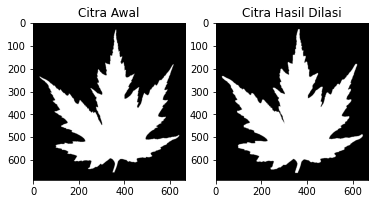

In [ ]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Saccharinum/Acer_Saccharinum_01.ab.jpg')
kernel = np.ones((5,5), np.uint8)
dilation = cv.dilate(img, kernel, iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

Buatlah program implementasi operasi opening dengan Structuring Element 
berbentuk square 7 x 7 tanpa dan dengan menggunakan library morphology dari 
openCV

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe5a5e64d10>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

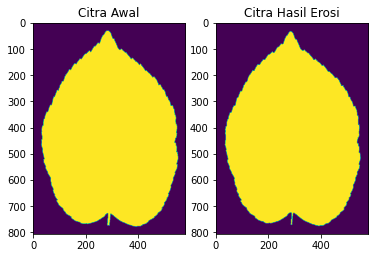

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Alnus_Cordata/Alnus_Cordata_01.ab.jpg',0)

kernel = np.ones((5,5), np.uint8)
erosion = cv.morphologyEx(img1, cv.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img1), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar, sehingga menghasilkan luaran sebagai berikut:

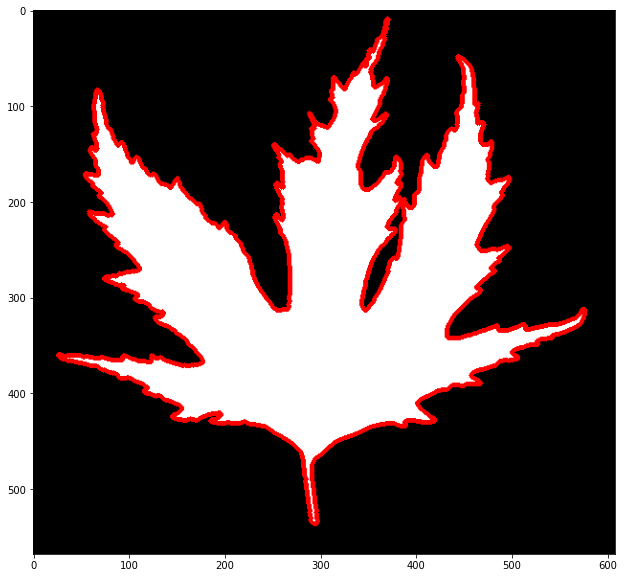

In [ ]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Saccharinum/Acer_Saccharinum_06.ab.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

Deteksi tepi gambar menggunakan Canny

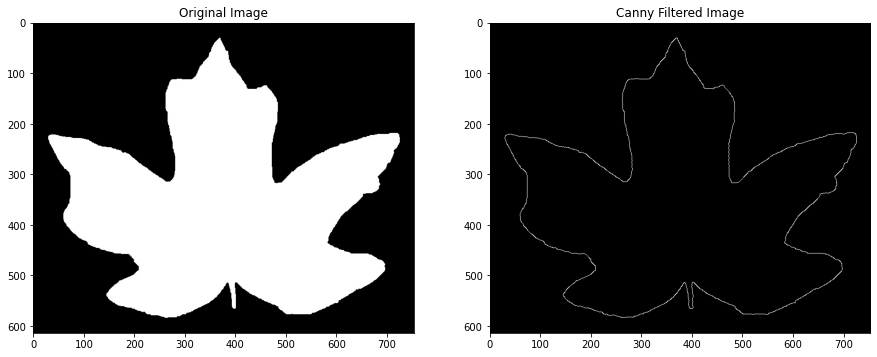

In [ ]:
image_original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Campestre/Acer_Campestre_01.ab.jpg', cv.IMREAD_COLOR)
# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
filtered_image = cv.Canny(image_gray, threshold1=20, threshold2=200)
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Canny Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

Implementasikan metode Harris Corner Detection. system pendeteksi sudut yang sering digunakan karena mampu menghasilkan nilai yang konsisten pada citra yang mengalami rotasi, penskalaan, variasi pencahayaan, maupun memiliki banya noise pada gambar.

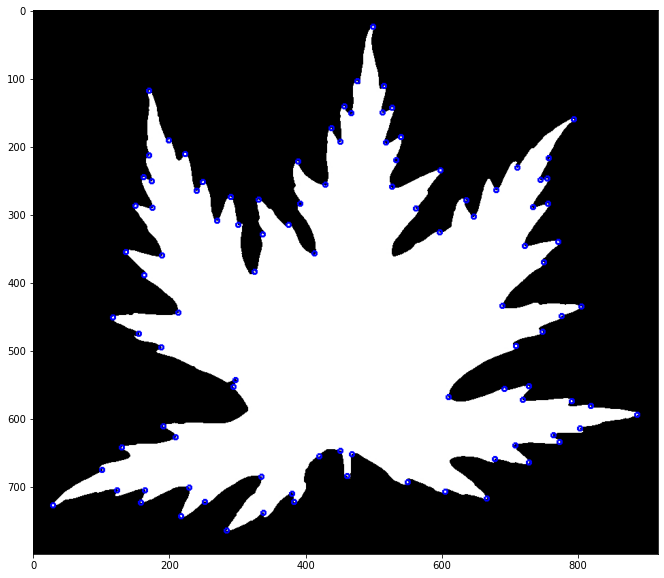

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Saccharinum/Acer_Saccharinum_09.ab.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

Fungsi untuk load image dari drive lalu resize image menjadi setengah dari image asli, kemudian kumpulan image dimasukkan ke dalam array

In [3]:
def load_image(array_image, path, color):
  for img in glob.glob(path):
    n = cv.imread(img, color)
    scale_percent = 50 # percent of original size
    width = int(n.shape[1] * scale_percent / 100)
    height = int(n.shape[0] * scale_percent / 100)
    dim = (width, height)
    n = cv.resize(n, dim)
    array_image.append(n)
  return array_image

Load Semua Gambar

In [4]:
daun1 = []
daun2 = []
daun3 = []
all_image = [daun1, daun2, daun3]

path_daun1 = '/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Campestre/*.jpg'
path_daun2 = '/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Saccharinum/*.jpg'
path_daun3 = '/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Alnus_Cordata/*.jpg'
path_image = [path_daun1, path_daun2, path_daun3]

for i in range(3):
  load_image(all_image[i], path_image[i], 0)

Tampilkan Gambar

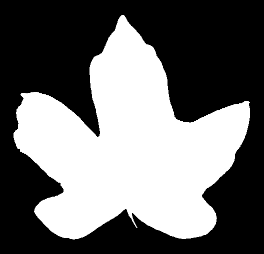

In [7]:
cv2_imshow(all_image[0][1])

Ekstraksi data dengan deteksi tepi gambar daun menggunakan canny

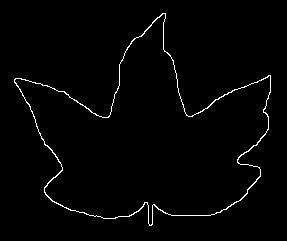

In [8]:
edged_daun = all_image.copy()
for i in range(len(edged_daun)):
  for j in range(len(edged_daun[0])):
    edged_daun[i][j] = cv.Canny(edged_daun[i][j], 30, 200)

cv2_imshow(edged_daun[0][15])

Menghitung area daun pada setiap dataset

In [9]:
area_daun1 = [0] * len(edged_daun[0])
area_daun2 = [0] * len(edged_daun[0])
area_daun3 = [0] * len(edged_daun[0])

for i in range(len(edged_daun)):
  for j in range(len(edged_daun[0])):
    for y in range(edged_daun[i][j].shape[0]):
      for x in range(edged_daun[i][j].shape[1]):
        if(edged_daun[i][j][y][x] > 0):
          if(i == 0):
            area_daun1[j] += 1
          elif(i == 1):
            area_daun2[j] += 1
          else:
            area_daun3[j] += 1

Membuat data train dari data area bentuk daun

In [10]:
label1 = [0] * len(area_daun1)
label2 = [1] * len(area_daun2)
label3 = [2] * len(area_daun3)

data1 = np.stack((area_daun1, label1), axis=1)
data2 = np.stack((area_daun2, label2), axis=1)
data3 = np.stack((area_daun3, label3), axis=1)

df = pd.DataFrame(data1, columns=["Area", "Label"])
df1 = pd.DataFrame(data2, columns=["Area", "Label"])
df2 = pd.DataFrame(data3, columns=["Area", "Label"])

df = df.append(df1)
df = df.append(df2)

print("Data Train : ")
df

Data Train : 


,Area,Label
0,1541,0
1,1147,0
2,998,0
3,1390,0
4,1310,0
5,1523,0
6,1089,0
7,1024,0
8,1464,0
9,1210,0


Membuat dan Train model Random Forest

In [11]:
X_train = df.iloc[:,0].values
X_train = X_train.reshape(-1,1)
Y_train = df.iloc[:,1].values

RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, Y_train)

def prediksi_daun(area):
  prediction = RandomForestClassifier.predict(area)
  if(prediction == 0):
    prediksi = "Acer_Campestre"
  elif(prediction == 1):
    prediksi = "Acer_Saccharinum"
  else:
    prediksi = "Alnus_Cordata"
  return prediksi

Create and train the model KNN

In [12]:
x_train = df.iloc[:,0].values
x_train = x_train.reshape(-1,1)
y_train = df.iloc[:,1].values

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

def prediksi_daun_knn(area):
  prediction = model.predict(area)
  if(prediction == 0):
    prediksi = "Acer_Capillipes"
  elif(prediction == 1):
    prediksi = "Acer_Circinatum"
  else:
    prediksi = "Castanea_Sativa"
  return prediksi

Klasifikasi menggunakan RandomForest

Acer_Campestre
[[1638]]


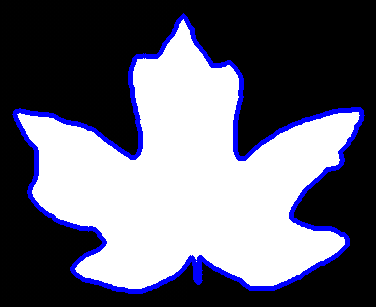

In [15]:
image = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Campestre/Acer_Campestre_01.ab.jpg')
#image = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Acer_Saccharinum/Acer_Saccharinum_01.ab.jpg')
#image = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_Genap_2022/Leaf Images 02/Alnus_Cordata/Alnus_Cordata_01.ab.jpg')

# resize gambar input
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv.resize(image, dim)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edged = cv.Canny(image_gray, 30, 200)

# Menerapkan fungsi findContours() openCV
contours, hierarchy = cv.findContours(edged, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(image, contours, -1, (255, 0, 0), 3)

# Menghitung area input gambar
area = np.array([[0]])
for i in range(edged.shape[0]):
  for j in range(edged.shape[1]):
    if(edged[i,j] > 0):
      area[0][0] += 1

# Prediksi Bentuk Daun
print(prediksi_daun(area))
# print(prediksi_daun_knn(area))
print(area)

cv2_imshow(image)

Load semua image pada folder Leaf Images 02

In [16]:
daun1 = []
daun2 = []
daun3 = []
daun1_gray = []
daun2_gray = []
daun3_gray = []

images = [daun1, daun2, daun3]
images_gray = [daun1_gray, daun2_gray, daun3_gray]

for i in range(3):
  load_image(images[i], path_image[i], 1)
  load_image(images_gray[i], path_image[i], 0)

Menerapkan Canny Edge Detection

In [17]:
edged_image = images_gray.copy()
for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    edged_image[i][j] = cv.Canny(edged_image[i][j], 30, 200)

Menerapkan Fungsi findCountours()

In [18]:
contours = [ [ None for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]
hierarchy = [ [ None for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]
for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    images[i][j] = cv.cvtColor(images[i][j], cv.COLOR_BGR2RGB)
    contours[i][j], hierarchy[i][j] = cv.findContours(edged_image[i][j], 
        cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    cv.drawContours(images[i][j], contours[i][j], -1, (255, 0, 0), 3)

Menghitung area input gambar

In [19]:
area = [ [ 0 for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]

for i in range(len(edged_image)):
  for j in range(len(edged_image[0])):
    for y in range(edged_image[i][j].shape[0]):
      for x in range(edged_image[i][j].shape[1]):
        if(edged_image[i][j][y][x] > 0):
          area[i][j] += 1

Membuat data test dengan label dari data area bentuk daun

In [20]:
label1 = [0] * len(area[0])
label2 = [1] * len(area[0])
label3 = [2] * len(area[0])

label = np.concatenate((label1, label2))
label = np.concatenate((label, label3))

data = []
for i in range(len(area)):
  for j in range(len(area[0])):
    data.append(area[i][j])

data = np.stack((data, label), axis=1)
df_test = pd.DataFrame(data, columns=["Area", "Label"])
df_test

,Area,Label
0,1541,0
1,1147,0
2,998,0
3,1390,0
4,1310,0
5,1523,0
6,1089,0
7,1024,0
8,1464,0
9,1210,0


Menentukan X dan Y test

In [21]:
X_test = df_test.iloc[:,0].values
X_test = X_test.reshape(-1,1)
Y_test = df_test.iloc[:,1].values

Prediksi data test menggunakan RandomForest

Model Test Accuracy Score : 
100.0%


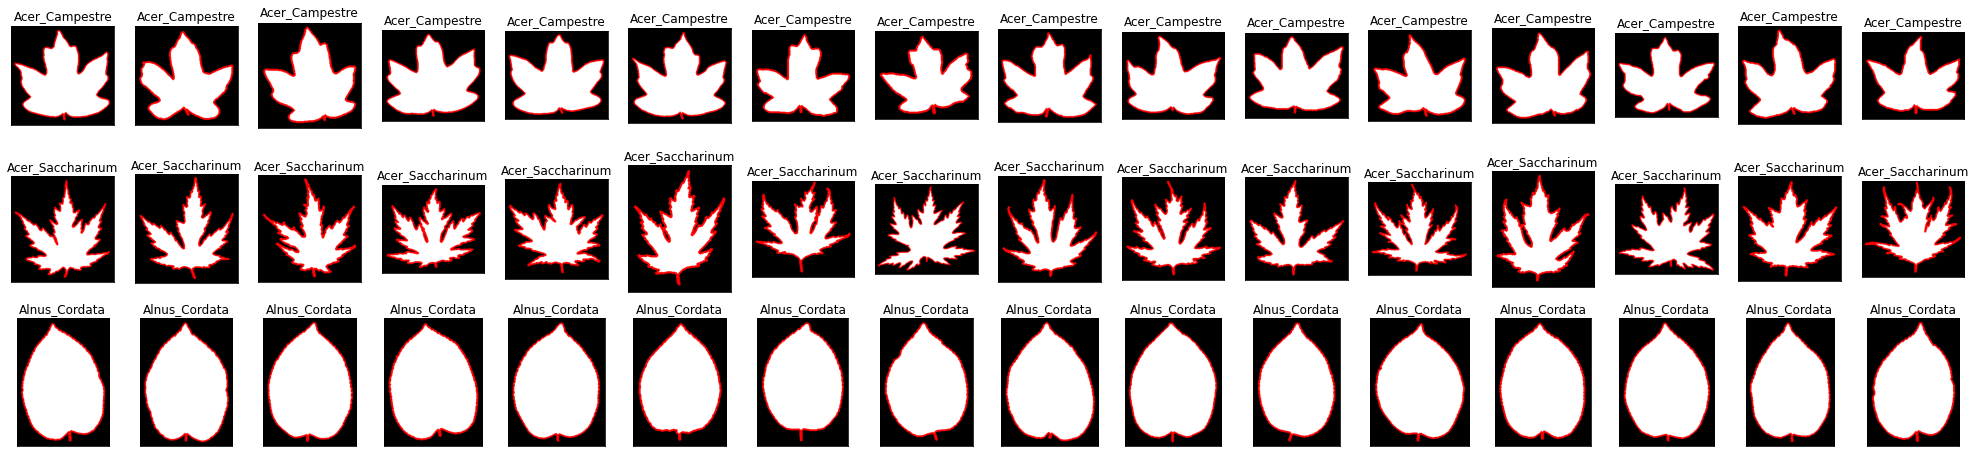

In [23]:
prediksi_rf = [ [ "" for y in range( len(edged_image[0]) ) ] for x in range( len(edged_image) ) ]

for i in range(len(prediksi_rf)):
  for j in range(len(prediksi_rf[0])):
    prediksi_rf[i][j] = prediksi_daun([[area[i][j]]])

print('Model Test Accuracy Score : ')
print(str(accuracy_score(Y_test, RandomForestClassifier.predict(X_test)) * 100)+ '%')

# Membuat figure
fig = plt.figure(figsize=(35, 8))

# setting jumlah baris dan kolom
rows = 3
columns = 16

# add subplot
index = 1
for i in range(rows):
  for j in range(columns):
    fig.add_subplot(rows, columns, index)
    plt.title(prediksi_rf[i][j])
    plt.imshow(images[i][j])
    plt.xticks([]),plt.yticks([])
    index += 1
plt.show()